Ce notebook propose une analyse du Dataset de la BCI Competition, qui comporte deux classes : left hand (main gauche), right hand (main droite). L'objectif est d'observer l'évolution des matrices de covariance des signaux à travers le temp.

<h1> A propos des données </h1>
Cet ensemble de données se compose de données EEG de 9 sujets d'une étude publiée dans [1]. Les sujets étaient droitiers, avaient une vision normale ou corrigée et étaient rémunérés pour leur participation aux expériences. Tous les volontaires étaient assis dans un fauteuil, regardant un écran plat placé à environ 1 mètre à hauteur des yeux. Pour chaque sujet, 5 sessions sont fournies, les deux premières sessions contenant des données d'entraînement sans retour d'information (sélection), et les trois dernières sessions ayant été enregistrées avec un retour d'information.

Trois enregistrements bipolaires (C3, Cz et C4) ont été enregistrés avec une fréquence d'échantillonnage de 250 Hz. Ils ont été filtrés en bande passante entre 0,5 Hz et 100 Hz, et un filtre coupe-bande à 50 Hz a été activé. Le placement des trois enregistrements bipolaires (distances plus grandes ou plus petites, plus antérieurs ou postérieurs) était légèrement différent pour chaque sujet (pour plus de détails, voir [1]). La position de l'électrode Fz a servi de référence EEG. En plus des canaux EEG, l'électrooculogramme (EOG) a été enregistré avec trois électrodes monopolaires.

Le paradigme de sélection basé sur des indices se composait de deux classes, à savoir l'imagerie motrice (MI) de la main gauche (classe 1) et de la main droite (classe 2). Chaque sujet a participé à deux sessions de sélection sans retour d'information enregistrées sur deux jours différents dans les deux semaines. Chaque session se composait de six séquences avec dix essais chacune et deux classes d'imagerie. Cela a donné 20 essais par séquence et 120 essais par session. Les données de 120 répétitions de chaque classe d'IM étaient disponibles pour chaque personne au total. Avant le premier entraînement à l'imagerie motrice, le sujet a exécuté et imaginé différents mouvements pour chaque partie du corps et a sélectionné celui qu'il pouvait imaginer le mieux (par exemple, serrer une balle ou tirer un frein).

Chaque essai a commencé par une croix de fixation et un bref signal sonore d'avertissement supplémentaire (1 kHz, 70 ms). Quelques secondes plus tard, un indice visuel était présenté pendant 1,25 seconde. Ensuite, les sujets devaient imaginer le mouvement de la main correspondante pendant une période de 4 secondes. Chaque essai était suivi d'une courte pause d'au moins 1,5 seconde. Un temps aléatoire allant jusqu'à 1 seconde a été ajouté à la pause pour éviter l'adaptation.

Pour les trois sessions de retour d'information en ligne, quatre séquences avec un retour d'information sous forme de smiley ont été enregistrées, chaque séquence se composant de vingt essais pour chaque type d'imagerie motrice. Au début de chaque essai (seconde 0), le retour d'information (un smiley gris) était centré sur l'écran. À la seconde 2, un bref signal sonore d'avertissement (1 kHz, 70 ms) était donné. L'indice était présenté de la seconde 3 à la seconde 7,5. À la seconde 7,5, l'écran devenait blanc et un intervalle aléatoire entre 1,0 et 2,0 secondes était ajouté à l'essai.

[1]
R. Leeb, F. Lee, C. Keinrath, R. Scherer, H. Bischof, G. Pfurtscheller. Brain-computer communication: motivation, aim, and impact of exploring a virtual apartment. IEEE Transactions on Neural Systems and Rehabilitation Engineering 15, 473–482, 2007

<h1>Importation et Prétraitement des Données :</h1> Les données de la première session du premier sujet sont chargées à partir du Dataset 2a. Les segments correspondant à chaque classe (left hand, right hand, tongue, feet) sont extraits de la  première session du premier run du premier sujet.

In [1]:
import mne
import moabb
from moabb.datasets import BNCI2014_004

<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.pick_types is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.pick_channels_regexp is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.
<frozen importlib._bootstrap>:219: FutureWarning: mne.io.pick.channel_type is deprecated will be removed in 1.6, use documented public API instead. If no appropriate public API exists, please open an issue on GitHub.


To use the get_shape_from_baseconcar, InputShapeSetterEEG, BraindecodeDatasetLoaderyou need to install `braindecode`.`pip install braindecode` or Please refer to `https://braindecode.org`.


c:\Users\ja_to\anaconda3\envs\MyTestEnv\lib\site-packages\moabb\pipelines\__init__.py:26: ModuleNotFoundError: Tensorflow is not installed. You won't be able to use these MOABB pipelines if you attempt to do so.
  warn(


In [2]:
dataset = BNCI2014_004()

In [3]:
print(dataset.subject_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


In [4]:
dataset.subject_list = [1]

In [5]:
sessions = dataset.get_data(subjects=[1])

In [6]:
subject = 1
session_name = "0train"
run_name = "0"
raw = sessions[subject][session_name][run_name]

In [7]:
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: C3, Cz, C4, EOG1, EOG2, EOG3, stim
 chs: 3 EEG, 3 EOG, 1 Stimulus
 custom_ref_applied: False
 dig: 6 items (3 Cardinal, 3 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 7
 projs: []
 sfreq: 250.0 Hz
>


In [8]:
print(raw.get_data().shape)

(7, 604803)


In [9]:
print(raw.get_data())

[[ 4.15045396e-06  4.44647898e-06  2.20035096e-06 ...  2.11795224e-06
   1.40993362e-06 -6.71396963e-07]
 [ 1.92263676e-07  1.91348135e-06  3.36308843e-06 ...  4.26337072e-06
   5.07820249e-06  1.96231022e-06]
 [ 2.25833524e-07  4.29999237e-06  2.22171359e-06 ...  9.58266575e-07
   3.99786374e-07 -1.85244526e-06]
 ...
 [ 1.87380789e-05  4.12603952e-05  5.38643473e-05 ... -7.41588464e-06
   7.62951095e-06  8.97230488e-06]
 [-5.88998245e-06  1.27260243e-05  2.00808728e-05 ... -7.78210117e-06
   3.05180438e-07  9.46059358e-07]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


Using matplotlib as 2D backend.


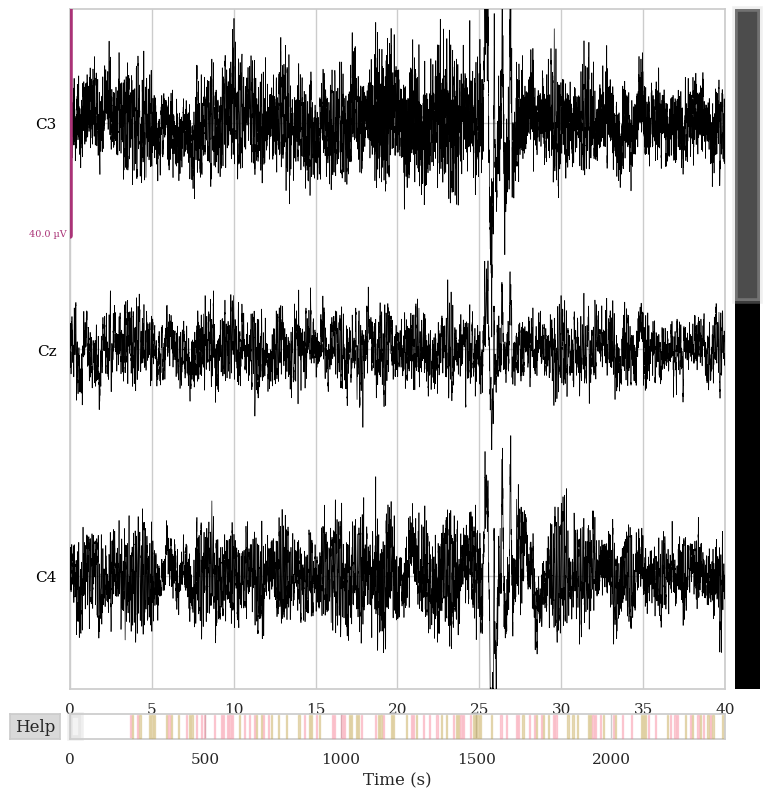

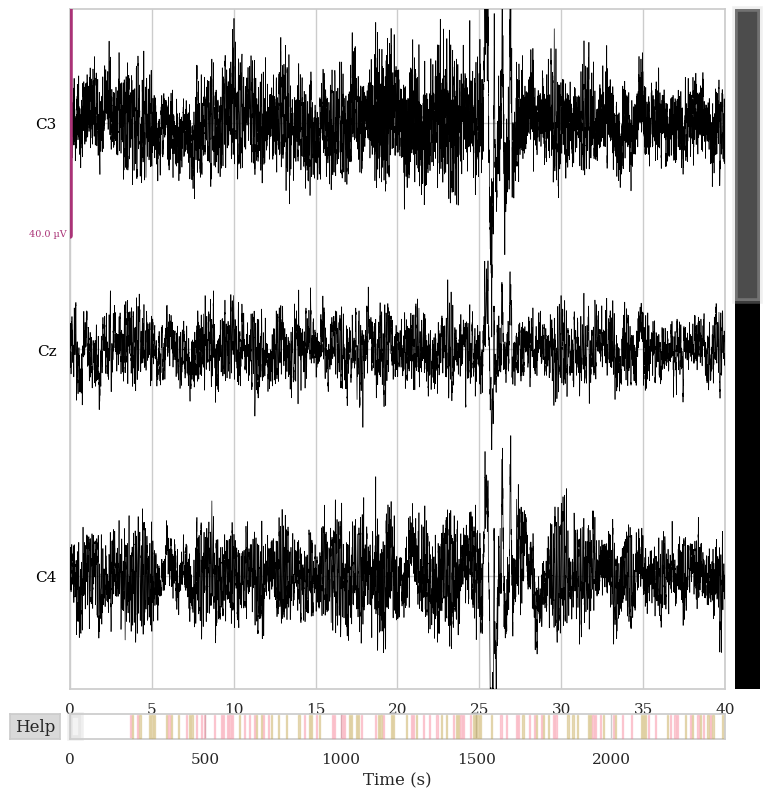

In [10]:
raw.plot(duration=40, n_channels=3)

In [11]:
raw_segment = raw.copy().crop(tmin=215)

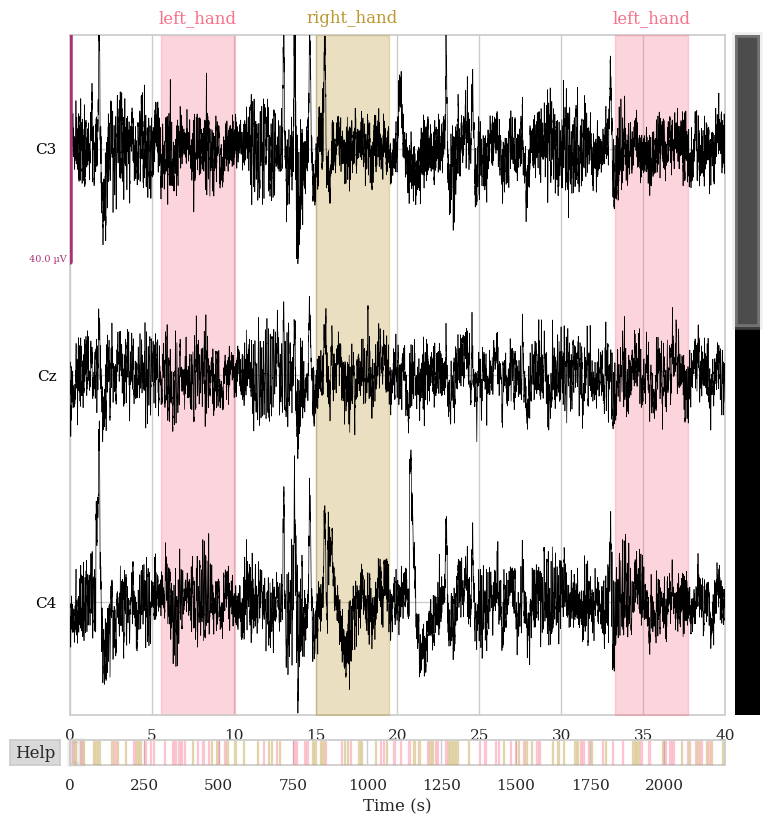

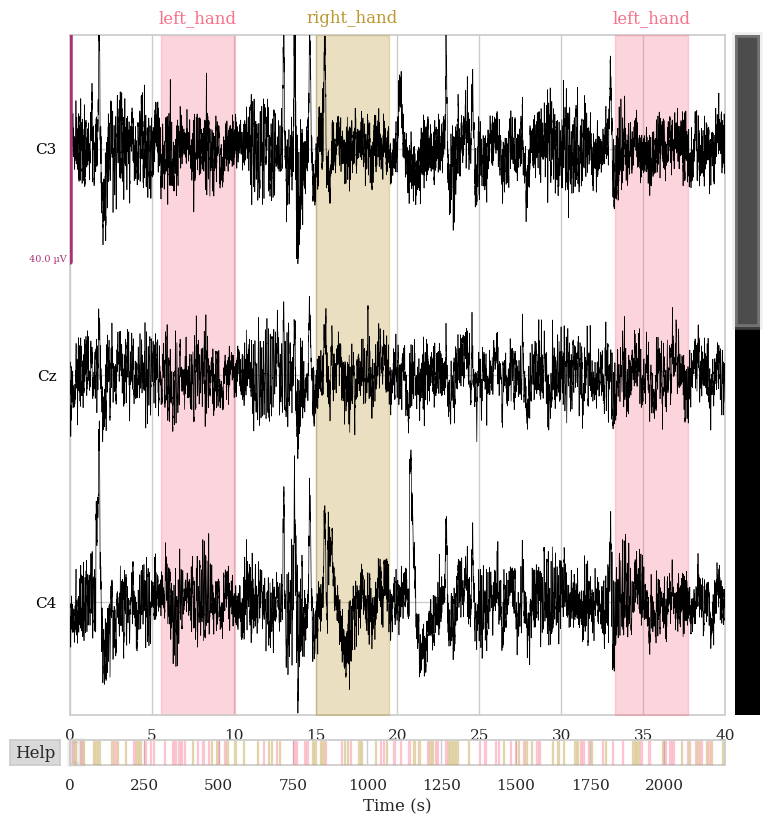

In [12]:
raw_segment.plot(duration=40, n_channels=3)

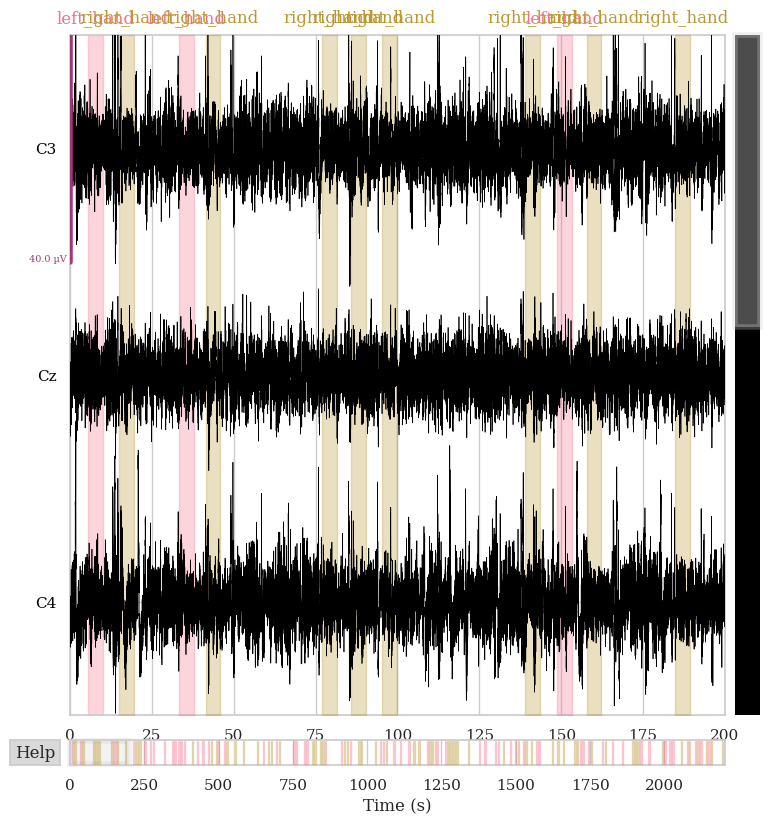

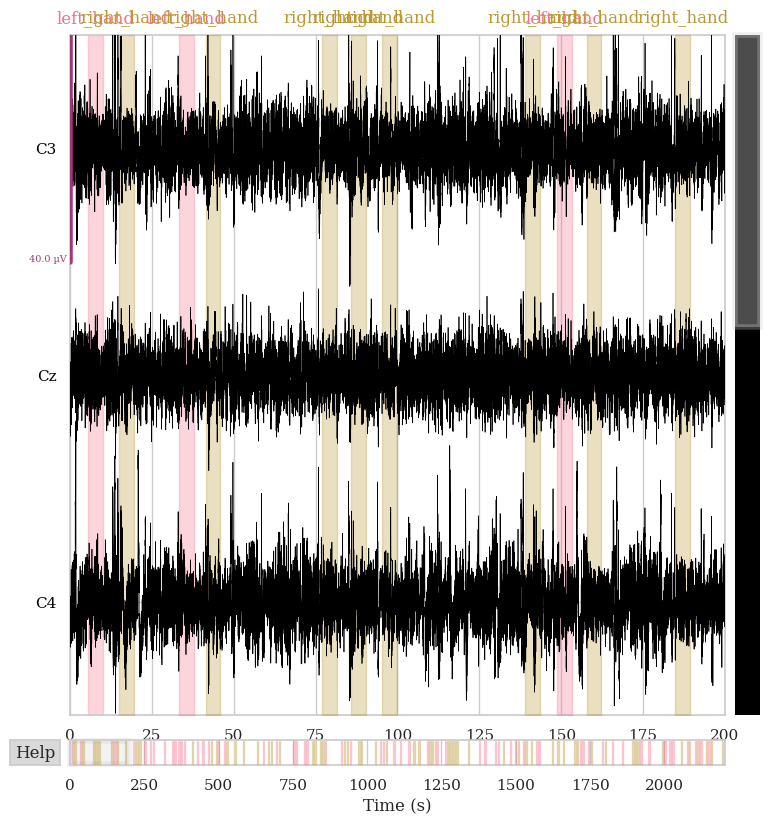

In [13]:
raw_segment.plot(duration=200, n_channels=3)

<h1>Calcul de la Covariance :</h1> 
À partir des données EEG, la covariance est calculée toutes les deux secondes. Cela permet de capturer les relations linéaires entre les différentes électrodes à travers le temps.
Il existe plusieur méthode dans mne pourle calcule de la covariance parmis ces méthodes il  y'a la méthode empirique ainsi que ‘diagonal_fixed’, ‘shrunk’, ‘oas’, ‘ledoit_wolf’, ‘factor_analysis’, ‘shrinkage’. Dans cette exemple je vais utiliser la méthode empirique.

In [14]:
cov = mne.compute_raw_covariance(raw_segment, tmin=0, tmax=4,method='empirical')

Using up to 20 segments
Number of samples used : 1000
[done]


In [15]:
print(cov.data.shape)

(3, 3)


In [16]:
print(cov.data)

[[2.71738804e-11 1.31386623e-11 2.39866079e-11]
 [1.31386623e-11 1.51606611e-11 1.52473444e-11]
 [2.39866079e-11 1.52473444e-11 4.48541511e-11]]


    The projection vectors do not apply to these channels.


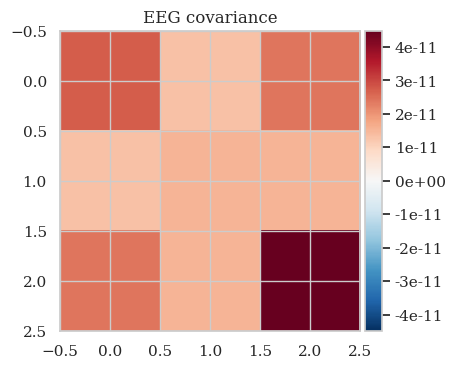

(<Figure size 380x370 with 2 Axes>, None)

In [17]:
cov.plot(raw.info, proj=True, show_svd=False)

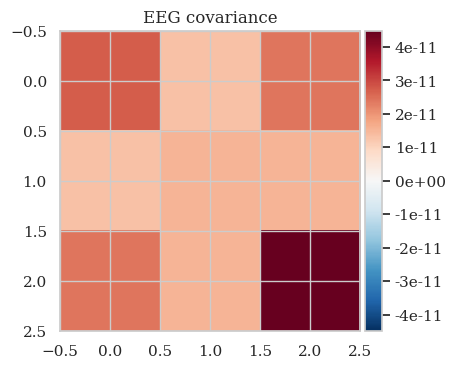

(<Figure size 380x370 with 2 Axes>, None)

In [18]:
mne.viz.plot_cov(cov, raw.info, show_svd=False)

<h1>Enregistrement des Matrices de Covariance :</h1> Chaque matrice de covariance est sauvegardée dans une varible figure_list ainsi qu'au format JPG pour créer un GIF animé illustrant l'évolution de la covariance dans le temps.

In [19]:
import numpy as np
import imageio as iio
import matplotlib.pyplot as plt

Using up to 20 segments
Number of samples used : 1000
[done]


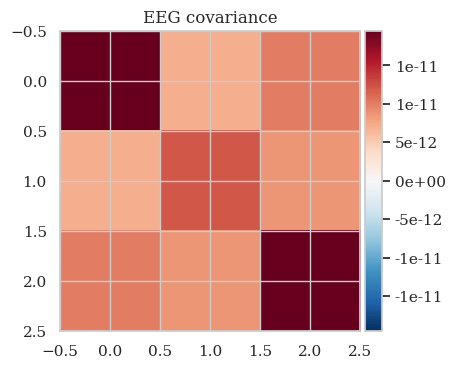

Using up to 20 segments
Number of samples used : 1000
[done]


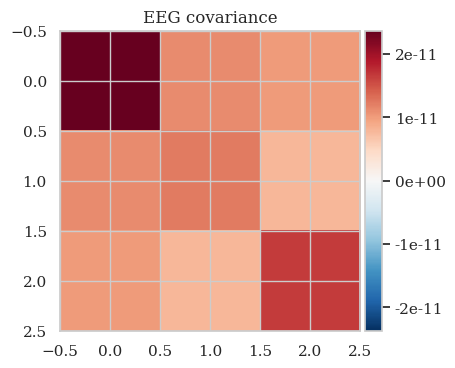

Using up to 20 segments
Number of samples used : 1000
[done]


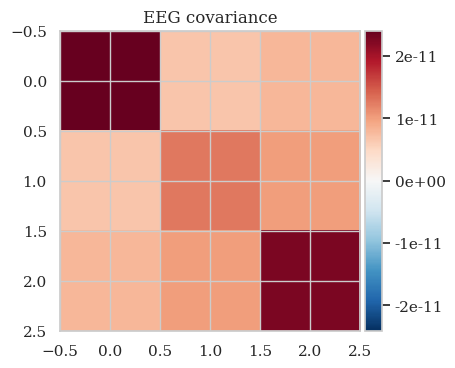

Using up to 20 segments
Number of samples used : 1000
[done]


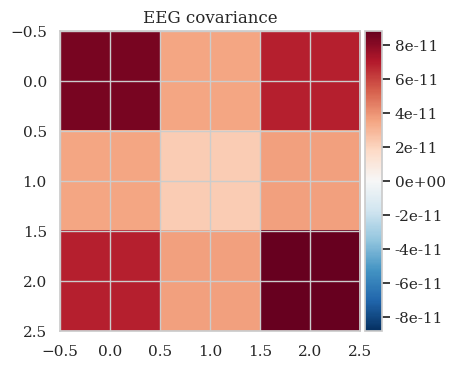

Using up to 20 segments
Number of samples used : 1000
[done]


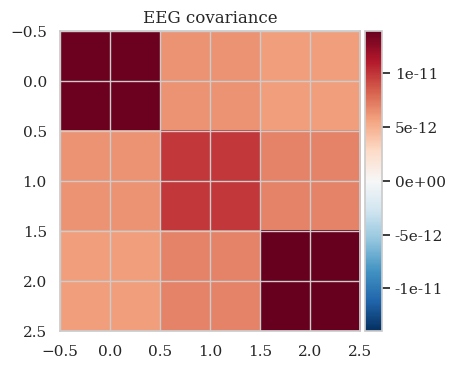

Using up to 20 segments
Number of samples used : 1000
[done]


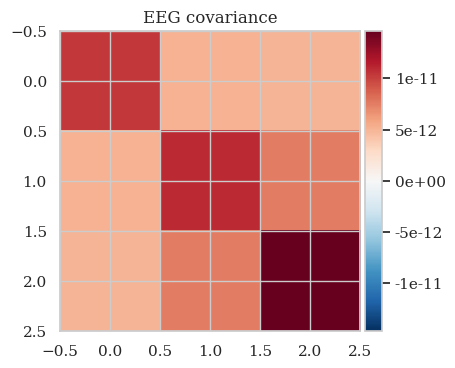

Using up to 20 segments
Number of samples used : 1000
[done]


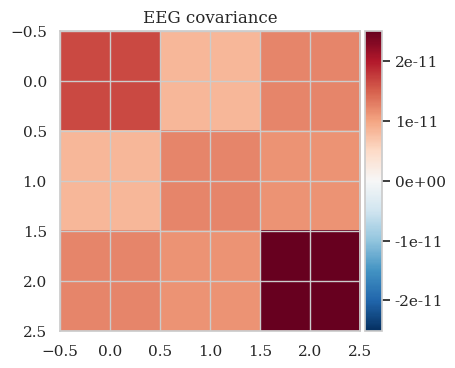

Using up to 20 segments
Number of samples used : 1000
[done]


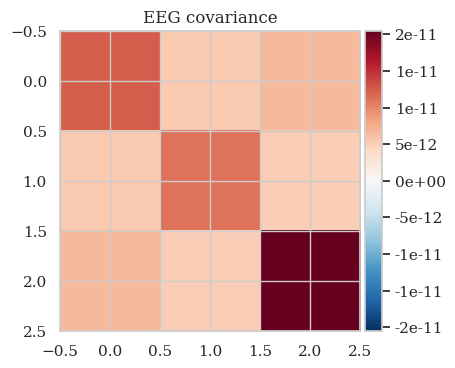

Using up to 20 segments
Number of samples used : 1000
[done]


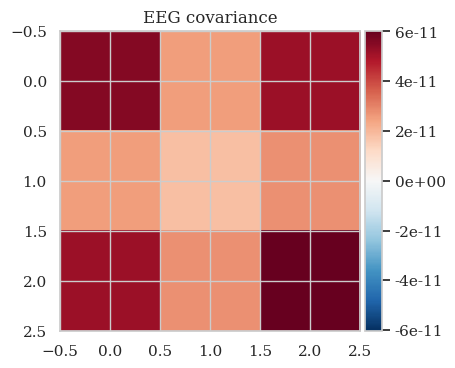

Using up to 20 segments
Number of samples used : 1000
[done]


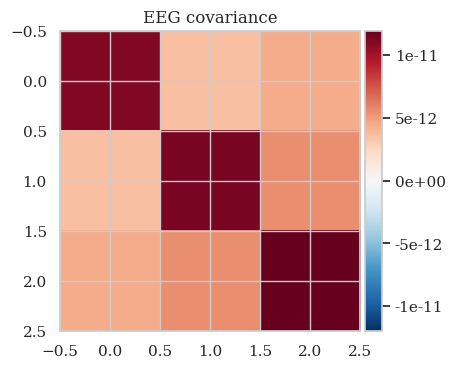

Using up to 20 segments
Number of samples used : 1000
[done]


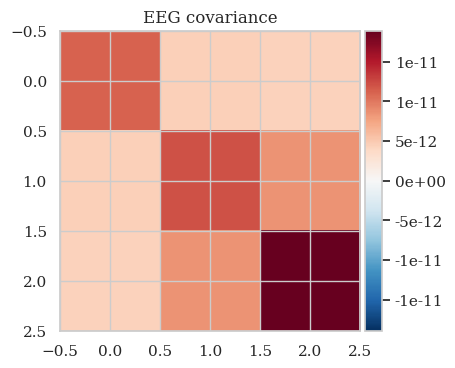

Using up to 20 segments
Number of samples used : 1000
[done]


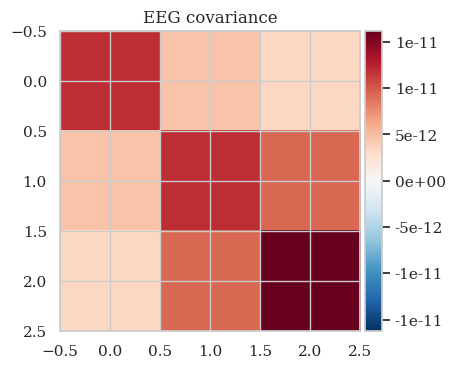

Using up to 20 segments
Number of samples used : 1000
[done]


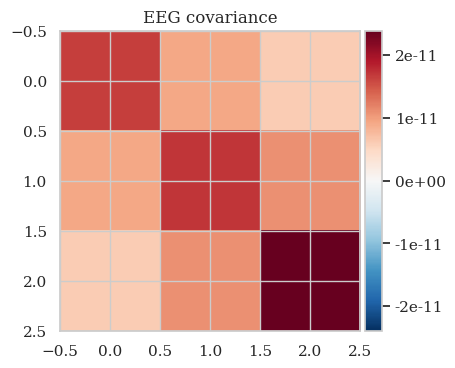

Using up to 20 segments
Number of samples used : 1000
[done]


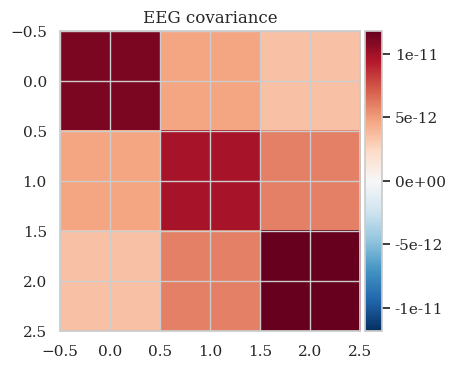

Using up to 20 segments
Number of samples used : 1000
[done]


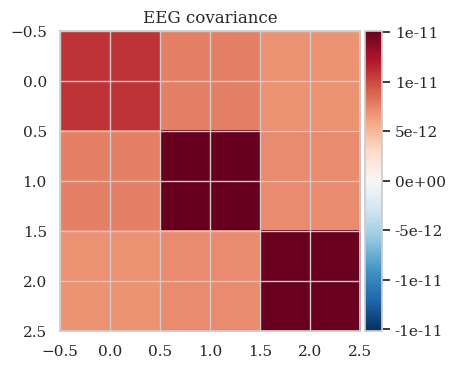

Using up to 20 segments
Number of samples used : 1000
[done]


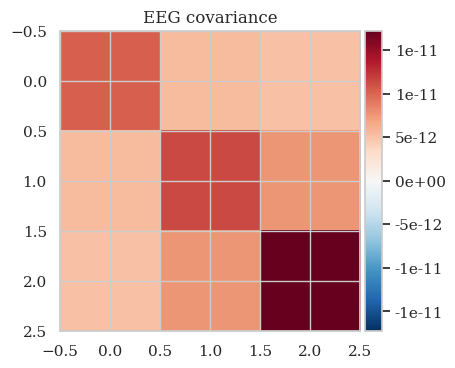

Using up to 20 segments
Number of samples used : 1000
[done]


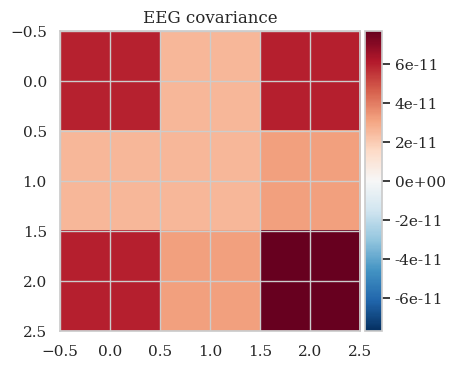

Using up to 20 segments
Number of samples used : 1000
[done]


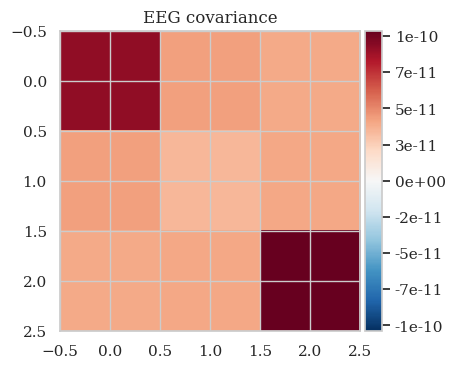

Using up to 20 segments
Number of samples used : 1000
[done]


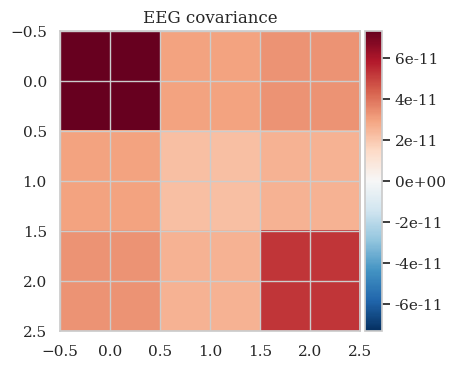

Using up to 20 segments
Number of samples used : 1000
[done]


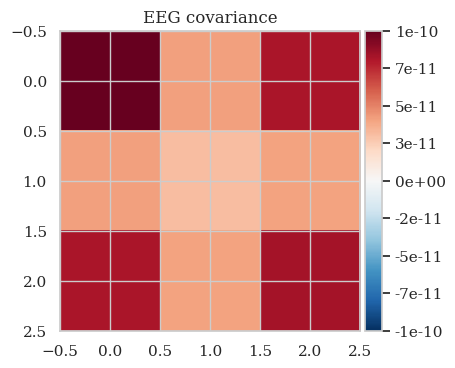

Using up to 20 segments
Number of samples used : 1000
[done]


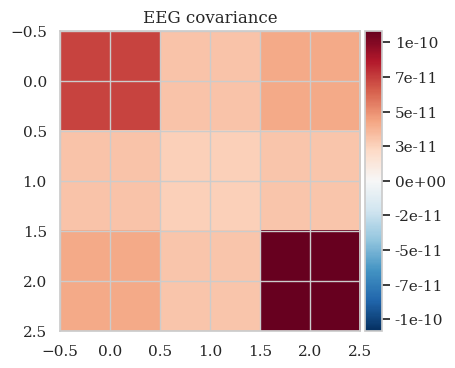

Using up to 20 segments
Number of samples used : 1000
[done]


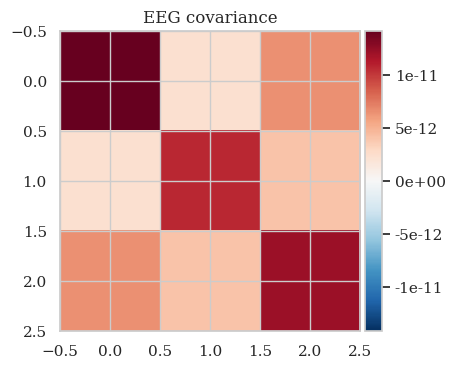

Using up to 20 segments
Number of samples used : 1000
[done]


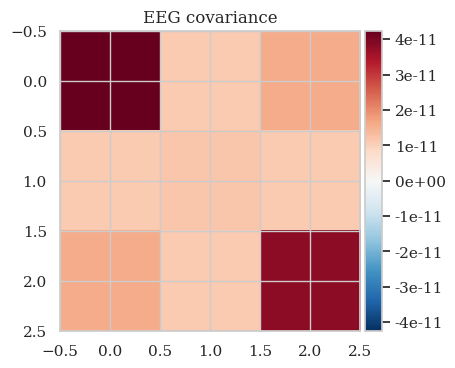

Using up to 20 segments
Number of samples used : 1000
[done]


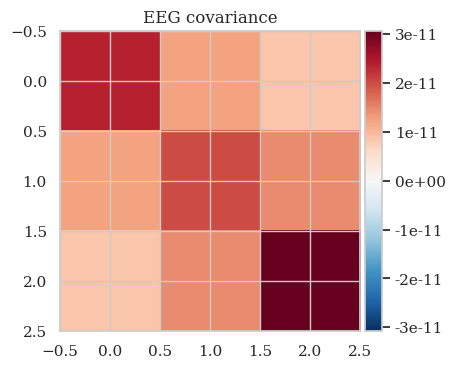

Using up to 20 segments
Number of samples used : 1000
[done]


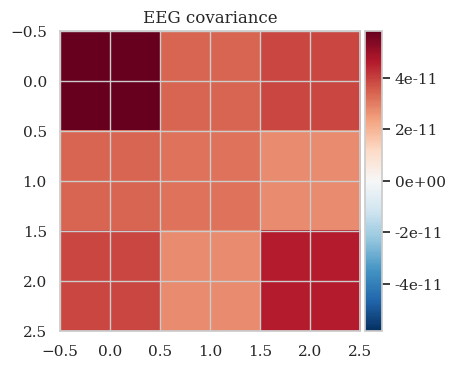

Using up to 20 segments
Number of samples used : 1000
[done]


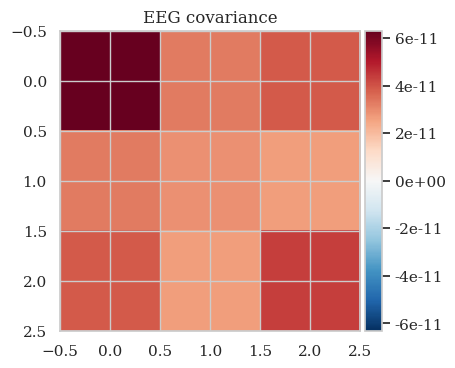

Using up to 20 segments
Number of samples used : 1000
[done]


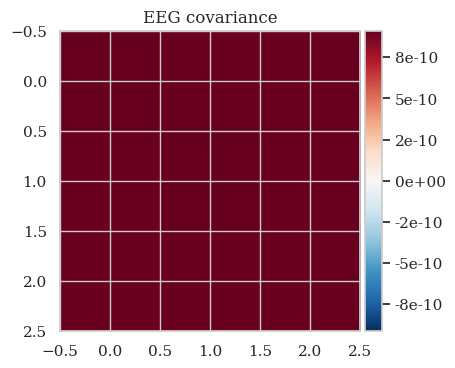

Using up to 20 segments
Number of samples used : 1000
[done]


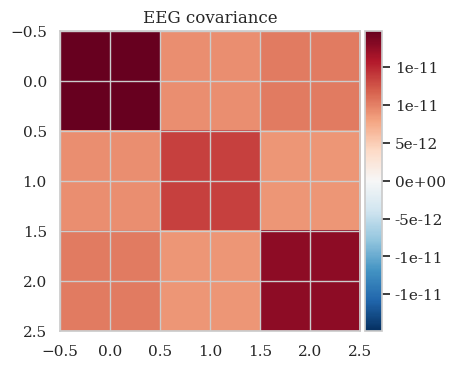

Using up to 20 segments
Number of samples used : 1000
[done]


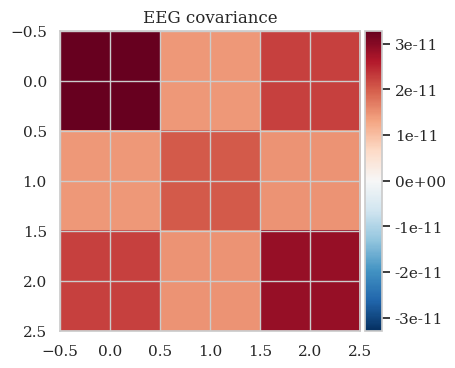

Using up to 20 segments
Number of samples used : 1000
[done]


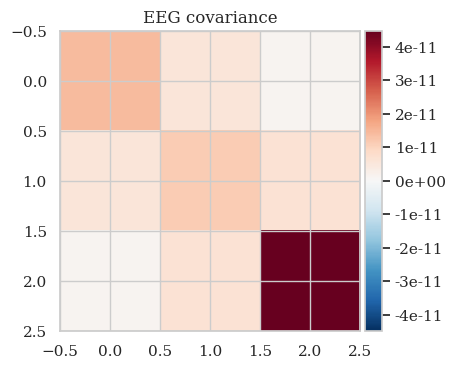

Using up to 20 segments
Number of samples used : 1000
[done]


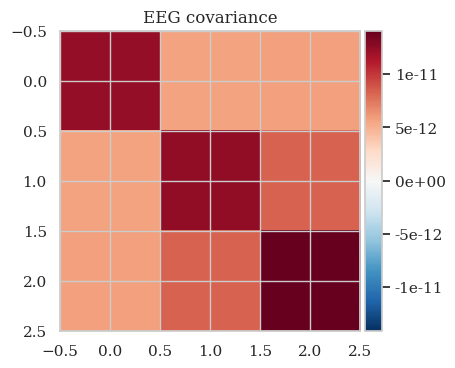

Using up to 20 segments
Number of samples used : 1000
[done]


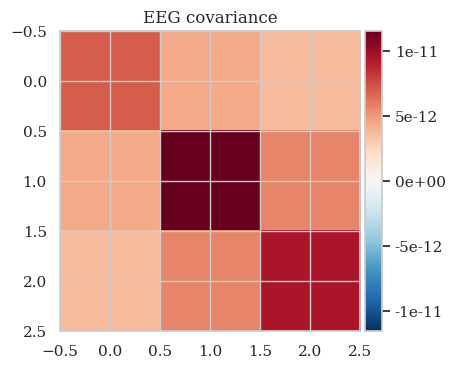

Using up to 20 segments
Number of samples used : 1000
[done]


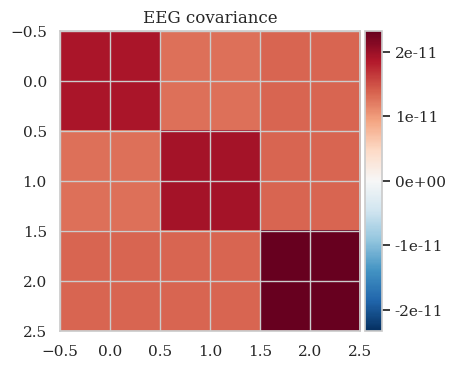

Using up to 20 segments
Number of samples used : 1000
[done]


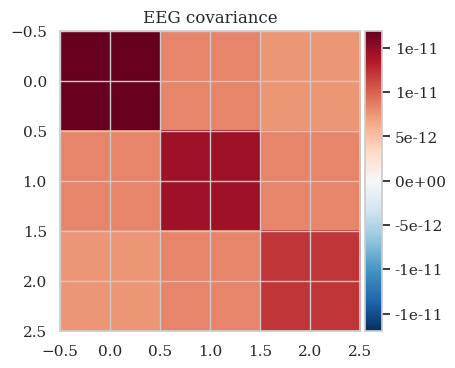

Using up to 20 segments
Number of samples used : 1000
[done]


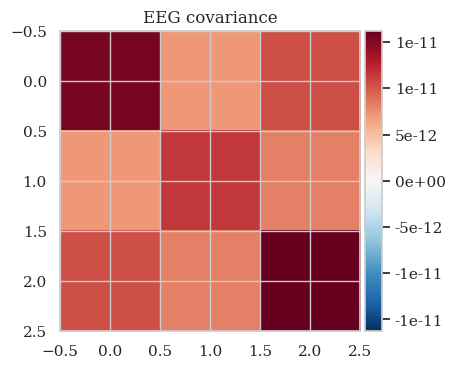

Using up to 20 segments
Number of samples used : 1000
[done]


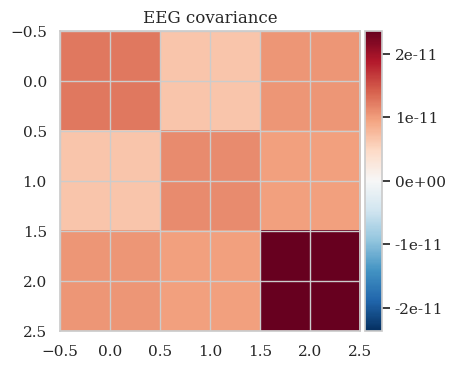

Using up to 20 segments
Number of samples used : 1000
[done]


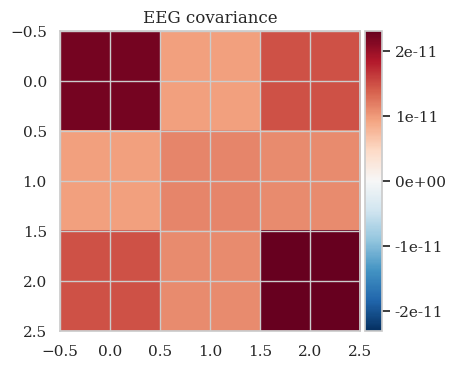

Using up to 20 segments
Number of samples used : 1000
[done]


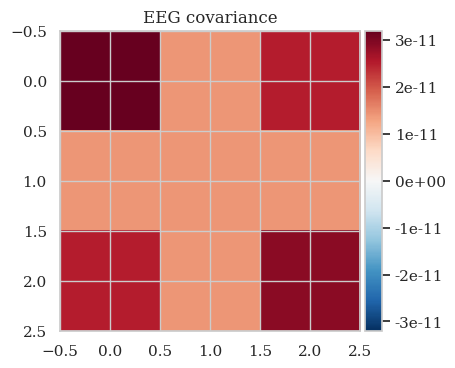

In [20]:
import matplotlib.pyplot as plt
import mne

# Créer une liste pour stocker les figures
figures_list = []

# Définir les paramètres de temps
tmin = 1  # Temps minimum initial
tmax = 5  # Temps maximum initial
step = 4  # Pas de décalage en secondes
num_segments = 75  # Nombre total de segments

# Charger les données brutes
# Remplacez raw par votre objet raw réel
# raw = mne.io.read_raw_fif('chemin_vers_votre_fichier_raw.fif')

# Boucle pour créer les figures
for i in range(num_segments):
    if i % 2 == 0:
        # Calculer le temps de début et de fin pour chaque segment
        segment_tmin = tmin + i * step
        segment_tmax = tmax + i * step
        
        # Extraire le segment de données brut correspondant
        raw_segment = raw.copy().crop(tmin=segment_tmin, tmax=segment_tmax)
        
        # Calculer la covariance pour ce segment
        cov_segment = mne.compute_raw_covariance(raw_segment, tmin=0, tmax=4, method='empirical')
        
        # Créer la figure de covariance pour ce segment
        fig_cov, _ = mne.viz.plot_cov(cov_segment, raw_segment.info, show_svd=False)
        fig_cov.savefig(f"images/cov_figure_{i}.jpg")
        
        # Ajouter la figure à la liste
        figures_list.append(fig_cov)
        fig_cov.clf()
    




In [21]:

frames = np.stack([iio.imread(f"images/cov_figure_{i}.jpg") for i in range(37)], axis = 0)

C:\Users\ja_to\AppData\Local\Temp\ipykernel_11428\3334856094.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  frames = np.stack([iio.imread(f"images/cov_figure_{i}.jpg") for i in range(37)], axis = 0)


In [22]:
iio.mimwrite('covariance1.gif', frames)